<a href="https://colab.research.google.com/github/ninjaabhinav/classical-ml-projects/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
X.shape

(20640, 8)

In [5]:
y.describe()

,0
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


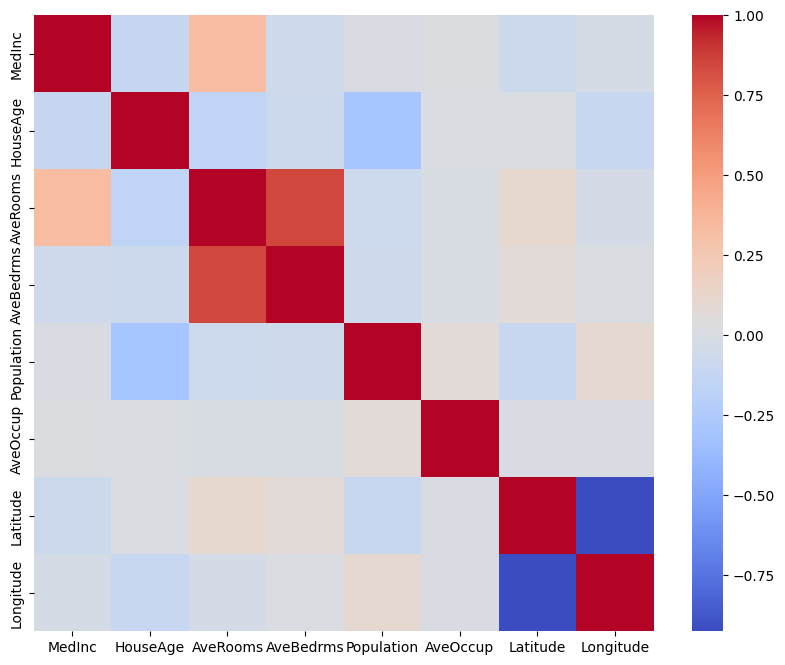

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(max_iter=5000),
    "Elastic Net": ElasticNet(max_iter=5000),
    "Random Forest": RandomForestRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

results


{'Linear Regression': {'MSE': 0.5558915986952442,
  'RMSE': np.float64(0.7455813830127763),
  'R2': 0.575787706032451},
 'Ridge': {'MSE': 0.5558548589435971,
  'RMSE': np.float64(0.7455567442814779),
  'R2': 0.5758157428913684},
 'Lasso': {'MSE': 1.3106960720039365,
  'RMSE': np.float64(1.1448563543099792),
  'R2': -0.00021908714592466794},
 'Elastic Net': {'MSE': 1.0442308546929173,
  'RMSE': np.float64(1.0218761444974227),
  'R2': 0.2031259919367321},
 'Random Forest': {'MSE': 0.254295610167023,
  'RMSE': np.float64(0.5042773147455901),
  'R2': 0.8059417980267574}}